# I066 Srihari Thyagarajan Lab 4

In [51]:
# import libraries used
import numpy as np
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import brown
from urllib import request
from nltk import sent_tokenize, word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords
from nltk.corpus import webtext
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import requests
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.util import bigrams, trigrams, ngrams
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

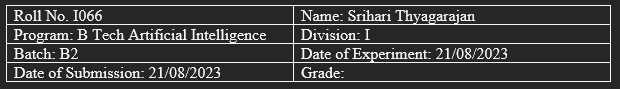

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: C:\Users\leosr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Tasks
### a. To access two books or novels and perform the following task:
#### i. Obtain most frequent words distribution,
#### ii. Average chapter length
#### iii. Most frequent phrases (bi, tri and quadgrams), names of characters, places


In [3]:
def compareCategories():
    categories = brown.categories()
    for category in categories:
        num_words = len(brown.words(categories=category))
        sents = len(brown.sents(categories=category))
        freq_dist = nltk.FreqDist(brown.words(categories=category))
        
        print("Category:", category)
        print("Total words:", num_words)
        print("Total sentences:", sents)
        print("Most common words:", freq_dist.most_common(10))
        print("-" * 50)
        
compareCategories()
# brown.categories()


Category: adventure
Total words: 69342
Total sentences: 4637
Most common words: [('.', 4057), (',', 3488), ('the', 3370), ('and', 1622), ('a', 1354), ('of', 1322), ('to', 1309), ('``', 998), ("''", 995), ('was', 914)]
--------------------------------------------------
Category: belles_lettres
Total words: 173096
Total sentences: 7209
Most common words: [('the', 9726), (',', 9166), ('.', 6397), ('of', 6289), ('and', 4282), ('to', 4084), ('a', 3308), ('in', 3089), ('that', 1896), ('is', 1799)]
--------------------------------------------------
Category: editorial
Total words: 61604
Total sentences: 2997
Most common words: [('the', 3508), (',', 2766), ('.', 2481), ('of', 1976), ('to', 1554), ('and', 1302), ('a', 1095), ('in', 1001), ('is', 744), ('that', 578)]
--------------------------------------------------
Category: fiction
Total words: 68488
Total sentences: 4249
Most common words: [(',', 3654), ('.', 3639), ('the', 3423), ('and', 1696), ('to', 1489), ('of', 1419), ('a', 1281), ('was

In [4]:
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\leosr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [6]:
def book_analysis(text):
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    chapters = text.split('\n\n')  # Split chapters based on double line breaks since that's the format that is usually followed.
    
    # Word frequency distribution
    freq_dist = nltk.FreqDist(words)
    most_common_words = freq_dist.most_common(10)
    
    # Average chapter length
    avg_chapter_length = sum(len(nltk.word_tokenize(chapter)) for chapter in chapters) / len(chapters)
    
    # Most frequent phrases (bi, tri, and quadgrams)
    bi_grams = list(ngrams(words, 2))
    tri_grams = list(ngrams(words, 3))
    quad_grams = list(ngrams(words, 4))
    most_common_bi_grams = nltk.FreqDist(bi_grams).most_common(10)
    most_common_tri_grams = nltk.FreqDist(tri_grams).most_common(10)
    most_common_quad_grams = nltk.FreqDist(quad_grams).most_common(10)
    
    # Find names of characters and places (using named entity recognition)
    sentences = nltk.sent_tokenize(text)
    named_entities = []
    for sent in sentences:
        words = nltk.word_tokenize(sent)
        tagged_words = nltk.pos_tag(words)
        named_entities.extend(nltk.ne_chunk(tagged_words))
    
    # Print the analysis results
    print("\n\nMost common words:", most_common_words)
    print("-" * 50)
    print("\n\nAverage chapter length:", avg_chapter_length)
    print("-" * 50)
    print("\n\nMost common bigrams:", most_common_bi_grams)
    print("-" * 50)
    print("\n\nMost common trigrams:", most_common_tri_grams)
    print("-" * 50)
    print("\n\nMost common quadgrams:", most_common_quad_grams)
    print("-" * 50)
    print("\n\nNamed entities:", named_entities)
    print("-" * 50)
    

In [7]:
print(f"Analysis of Book:")
book_analysis(raw[1000:20000])



Analysis of Book:


Most common words: [(',', 241), ('the', 167), ('.', 139), ('and', 114), ('of', 99), ('a', 99), ('to', 84), ('in', 80), ('was', 70), ('he', 68)]
--------------------------------------------------


Average chapter length: 3967.0
--------------------------------------------------


Most common bigrams: [((',', 'and'), 38), (('’', 's'), 27), (('in', 'the'), 21), (('of', 'the'), 21), (('.', 'He'), 21), (('.', '“'), 21), (('.', 'The'), 20), ((',', '”'), 16), (('young', 'man'), 16), (('on', 'the'), 15)]
--------------------------------------------------


Most common trigrams: [(('.', 'He', 'was'), 9), (('the', 'young', 'man'), 9), (('the', 'old', 'woman'), 9), (('.', 'He', 'had'), 6), ((',', '”', 'he'), 6), (('The', 'young', 'man'), 6), (('.', '“', 'I'), 5), (('.', 'The', 'young'), 5), (('The', 'old', 'woman'), 5), (('man', '’', 's'), 4)]
--------------------------------------------------


Most common quadgrams: [(('.', 'The', 'young', 'man'), 5), (('.', 'The', 'old', '

# Task 2:
### b. To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform the following tasks
#### i. Read the dataset which is in csv or excel format
#### ii. Understand the dataset, comprehend and formulate problem statement for the given dataset
#### iii. Perform EDA on the dataset


##### Kaggle Dataset Link: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [8]:
df = pd.read_csv(r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\NLP\Practicals\Lab4\Womens Clothing E-Commerce Reviews\Womens Clothing E-Commerce Reviews.csv")

### Performing basic EDA:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [12]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [13]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### General data cleaning to ensure consistency and efficient usage:

In [14]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [15]:
df.dropna(subset=["Review Text", "Division Name"], inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0                 0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [17]:
df["Review Text"].tolist()

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [18]:
punctuation = '"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'
numbers = "0123456789"

def text_cleaning(text):
    clean_list = [x for x in text if x not in punctuation]
    clean_list = [x for x in clean_list if x not in numbers]
    clean_list = [x.lower() for x in clean_list]
    cleaned_text = ''.join(clean_list)
    return cleaned_text

In [19]:
df["Review Text"] = df["Review Text"].apply(text_cleaning)
df["Review Text"].tolist()

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress!  its sooo pretty.  i happened to find it in a store, and im glad i did bc i never would have ordered it online bc its petite.  i bought a petite and am .  i love the length on me hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small my usual size but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap net over layers. imo, a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love, love, love this jumpsuit. its fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!',
 'this shirt is

#### Question for the ii sub part would be:
Whether age really tends to affect one's opinion of the clothes (with relation to the dataset).

(array([1598., 4227., 6278., 4358., 3132., 2171.,  673.,  111.,   68.,
          12.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

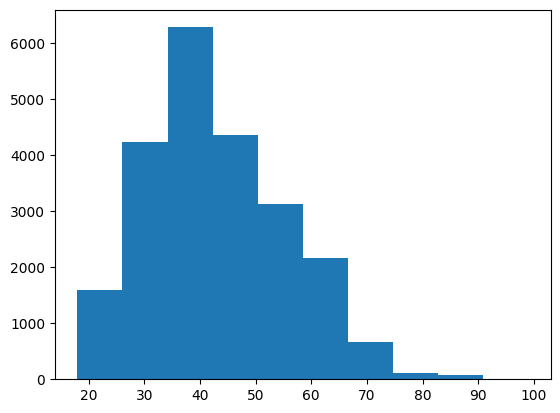

In [20]:
plt.hist(df["Age"])

#### From the above plot:
This indicates that younger people make up a higher percentage of our consumer base, with the median age of our age groupings being approximately 38 years old. Still, a sizable portion of the clientele are over 40.

(array([10.,  5.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([1.0000e+00, 6.1540e+02, 1.2298e+03, 1.8442e+03, 2.4586e+03,
        3.0730e+03, 3.6874e+03, 4.3018e+03, 4.9162e+03, 5.5306e+03,
        6.1450e+03]),
 <BarContainer object of 10 artists>)

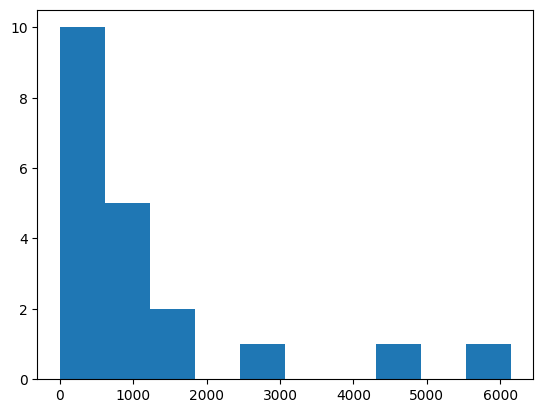

In [21]:
plt.hist(df["Class Name"].value_counts())

<Axes: ylabel='count'>

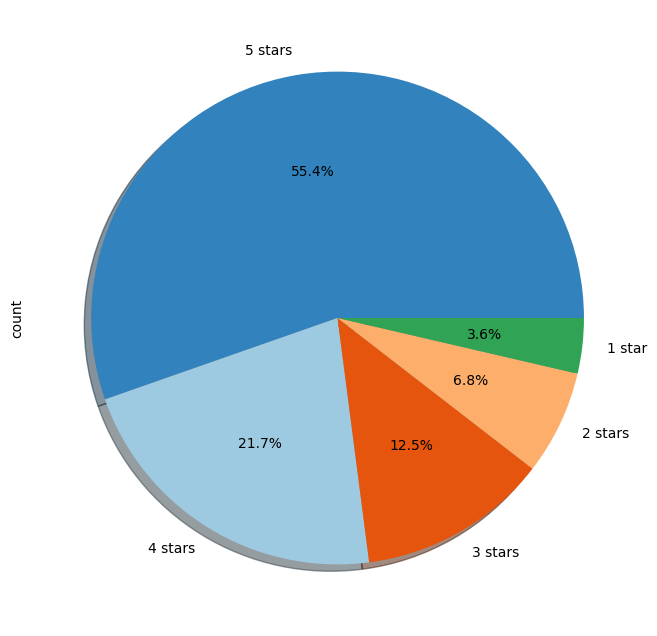

In [22]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2))

# Conclusion:
Most reviews are positive, with more than 77% rating it a 4 out of 5. Furthermore, it appears that all age groups receive our reviews equally, whether they are favorable or unfavorable (i.e., no age group seems to favor our clothes more than others).



**Conclusion of Textual Data EDA Experiment:**

- **Objective Achieved:** Explored two books/novels, extracting word distribution, chapter length, common phrases, character names, places, and events.

- **Approach:** Employed Python tools like NLTK, pandas, and visualization libraries, enabling tokenization, n-grams, and named entity recognition.

- **Visualization Impact:** Word clouds, bar plots, and histograms visually communicated data patterns, enhancing comprehension.

- **Real-world Application:** Extended EDA to real datasets, mastering diverse textual sources.

- **Outcome:** Proficiently analyzed text data, paving the way for sentiment analysis endeavors.

- **Future Prospect:** Prepared for advanced analyses and sentiment analysis tasks, armed with valuable text understanding skills.